In [1]:
import numpy as np
from scipy.ndimage import gaussian_filter
from scipy.optimize import curve_fit
from scipy.integrate import trapezoid as trap
import matplotlib.pyplot as plt
from peakutils import indexes
import pencil as pc
from IPython.display import display, Latex
import modes_old

         pencil has moved to pencil_old.
To change your scripts accordingly:
import pencilnew as pc -> import pencil as pc
import pencil as pc -> import pencil_old as pc


In [2]:
plt.rcParams.update({'font.size': 12})
plt.rcParams['text.usetex'] = True

In [3]:
# class modes():
#     def __init__(self, sim, ts, xyaver, yaver):
#         self.sim = sim
#         self.ts = ts
#         self.xyaver = xyaver
#         self.yaver = yaver

#         self.grid = sim.grid
#         self.param = sim.param
#         self.z = self.grid.z
#         # index of z=0
#         self.indx_zref = np.argmin(abs(self.z-0))
#         # box geometry
#         self.lx, self.ly, self.lz = self.param.get('lxyz')
#         #reading the latest thermodynamic variables
#         self.rho = self.xyaver.xy.rhomz[-1,:]
#         self.pre = self.xyaver.xy.ppmz[-1,:]
#         self.tem = self.xyaver.xy.TTmz[-1,:]
#         # finding T_d
#         self.T_d = self.temperature(10,self.indx_zref-10)
#         # finding T_u
#         self.T_u = self.temperature(self.indx_zref+10,-4)
#         self.q = self.T_d/self.T_u
#         # finding u_rms
#         self.u_rms = self.urms(200, 800)
#         # other parameters
#         self.cp = self.param.get('cp')
#         self.gamma = np.round(self.param.get('gamma'), 3)
#         self.R = np.round(self.cp*(1-(1/self.gamma)), 4)
#         #sound speed in upper and lower layer
#         self.cs_d = self.cs(self.gamma, self.R, self.T_d)
#         self.cs_u = self.cs(self.gamma, self.R, self.T_u)
        
#         self.gz = -self.param.get('gravz')
#         self.L0 = np.round(self.cs_d**2/self.gz, 3)
#         self.omega0 = np.round(self.gz/self.cs_d, 3)
#         self.d = self.D(self.L0,self.u_rms,self.cs_d)

#     def index(x, y):
#         return np.argmin(np.abs(x - y))

#     def temperature(self, i, j):
#         def const(t, a):
#             return a
#         z_ij = self.z[i:j]
#         T_ij = self.tem[i:j]
    
#         popt, _ = curve_fit(const, z_ij, T_ij)
#         # z_fit = z[i:j]
#         T_fit = const(z_ij, popt[0])
#         return round(np.average(T_fit),3)
    
#     def cs(self, gamma, R, T):
#         return np.round(np.sqrt(gamma*R*T), 3)
    
#     def urms(self, ti, tj):
#         def g(t, a, b):
#             return a*t+b
#         popt, _ = curve_fit(g, self.ts.t[ti:tj], self.ts.urms[ti:tj])
#         u_fit = g(self.ts.t[ti:tj], *popt)
#         return round(np.average(u_fit),4)
    
#     def D(self, L0, u_rms, cs_d):
#         return np.round(L0*u_rms/cs_d, 3)
    
#     def FT(self, uz_real):
#         return np.fft.fftn(uz_real, s=None, axes=(-2, -1), norm=None)
    
#     def logP(self, uz_fourier,D):
#         return np.log(np.abs(uz_fourier/D**2))

#     def omega_tilde(self, tt, t1, t2):
#         "tt=yaver.t"
#         t_gd = tt[t1:t2]  #time interval where urms has reached a steady state
#         t_len = np.size(t_gd)
#         dom = 2*np.pi/t_len #unit step alomg omega direction
#         if t_len%2 == 0:
#             fom = np.arange(0, t_len/2+1)
#             rom = -np.flip(np.arange(1, t_len/2))
#             om = np.concatenate((fom, rom))*dom
#         else:
#             fom = np.arange(0, t_len/2)
#             rom = -np.flip(np.arange(1, t_len/2))
#             om = np.concatenate((fom, rom))*dom
#         return om/self.omega0

#     def k_tilde(self):
#         nx = len(self.grid.x)
#         dkx = 2*np.pi/self.lx    #unit step along kx direction
#         if nx%2 == 0:
#             fnx = np.arange(0, nx/2+1)
#             rnx = -np.flip(np.arange(1, nx/2))
#             kx = np.concatenate((fnx, rnx))*dkx
#         else:
#             fnx = np.arange(0, nx/2)
#             rnx = -np.flip(np.arange(1, nx/2))
#             kx = np.concatenate((fnx, rnx))*dkx
#         return kx*self.L0
    
#     def mode_finder(x_data, y_data, plot=False, thres=0.3, min_dist=100):
#         indx = indexes(y_data, thres=thres, min_dist=min_dist)
#         if plot:
#             plt.figure(figsize=(14,5))
#             plt.plot(x_data, y_data)
#             plt.scatter(x_data[indx], y_data[indx], c='r')
#             plt.xlim(x_data[0], x_data[-1])
#             plt.ylim(0,)
#             plt.show()
#         else:
#             return indx

#     def mode_data(y_data, x_data, index: int, lower_bound: int, upper_bound: int):
#         lb = index-lower_bound
#         ub = index+upper_bound
#         data_dict = {'x': x_data[lb:ub], 'y': y_data[lb:ub]}
#         return data_dict
    
#     def sigma(power, filtered_power):
#         sig_tot = (power-filtered_power)**2
#         sig_ave = np.sqrt(sum(sig_tot)/len(sig_tot))
#         # sig = sig_ave*np.ones(len(sig_tot_kin[idl_f_kin:idu_f_kin]))
#         return sig_ave

#     def mode_fit(func,x_data,y_data,base=True,**kwargs):
#         para, _ = curve_fit(func, x_data, y_data, **kwargs)
#         y_fit = func(x_data, *para)
#         if base:
#             y = y_fit
#         else:
#             y = y_fit-x_data*para[4]-para[3]
#         return y

#     pass

In [4]:
sim = pc.get_sim(quiet=True)
xyaver = pc.read.aver(plane_list=['xy'])
# #reading timeseries data
ts = pc.read.ts()
yaver = pc.read.aver(plane_list='y')

Read 16076 lines.


In [5]:
sim.param.get('cp')

1.0

In [6]:
sim.param.get('gamma')

1.6666666666666667

In [7]:
cv = 1.0/1.6666

In [8]:
1.0/cv

1.6666

In [9]:
# xyaver.xy.bx2mz

In [10]:
sim.param.get('nu')

0.001

In [14]:
mode = modes_old.Modes(sim, ts, xyaver, yaver, ini=False, dyn=True)

Have you included bx2mz and by2mz in xyaver.in?


In [15]:
HH = mode.scale_height

In [16]:
# cs = mode.cs()
# cs

In [17]:
cs = np.sqrt(mode.gamma*mode.pre/mode.rho)

Text(0.5, 0, '$grid (z)$')

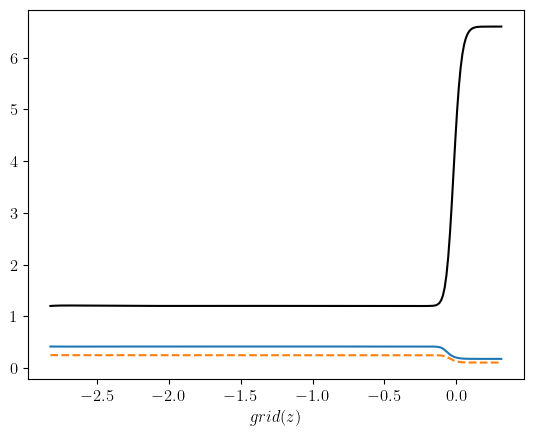

In [18]:
H = mode.tem*(mode.cp-cv)/mode.gz
plt.plot(mode.z, H, label='H', c='k')
plt.plot(mode.z, cs/(2*HH), ls='-', label=r'$\omega_c$')
plt.plot(mode.z, mode.gz/(2*cs), ls='--', label=r'$\omega_c$')
plt.xlabel(r"$grid (z)$")

In [19]:
data = np.loadtxt('stratification.dat')

In [20]:
tem0 = mode.xyaver.xy.TTmz[0,:]
tem10 = mode.xyaver.xy.TTmz[10,:]
tem100 = mode.xyaver.xy.TTmz[100,:]
tem400 = mode.xyaver.xy.TTmz[400,:]

## Variation of Thermodynamic Variables along z

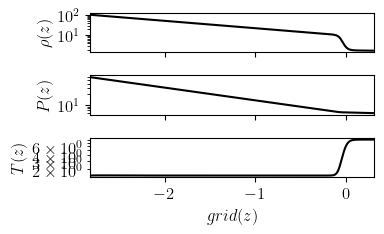

In [21]:
fig, axs = plt.subplots(3,1, figsize=(4,2.5), sharex=True)

axs[0].plot(mode.z, mode.rho, color='k')
# axs[0].plot(data[:,0], data[:,1], color='k', ls=':')
# axs[1].plot(grid.z, pressure, color='k')
axs[1].plot(mode.z, mode.pre, color='k')
axs[2].plot(mode.z, mode.tem, color='k')

# axs[2].plot(mode.z, tem0, color='r')
# axs[2].plot(mode.z, tem10, color='k')
# axs[2].plot(mode.z, tem100, color='k')
# axs[2].plot(data[:,0], data[:,2], color='b')

#axs[2].plot(grid.z, xya.xy.TTmz[-1], color='k')

axs[0].set_yscale("log")
axs[1].set_yscale("log")
axs[2].set_yscale("log")

# axs[0].set_xlim(z[0], z[-1])
# axs[1].set_xlim(z[0], z[-1])
axs[2].set_xlim(mode.z[0], mode.z[-1])

axs[0].set_ylabel(r"$\rho(z)$")
axs[1].set_ylabel(r"$P(z)$")
axs[2].set_ylabel(r"$T(z)$")

# xticks = (np.pi/10)*np.array([-9, -7, -5, -3, -1, 0, 1])
# axs[2].set_xticks(xticks)
# axs[2].set_xticklabels([r'$-\frac{9\pi}{10}$', r'$-\frac{7\pi}{10}$', r'$-\frac{5\pi}{10}$', \
#                      r'$-\frac{3\pi}{10}$', r'$-\frac{\pi}{10}$', r'$0$', r'$\frac{\pi}{10}$'])
plt.xlabel(r"$grid (z)$")
plt.tight_layout()
plt.savefig("variation.jpg")

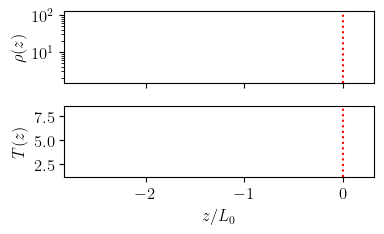

In [22]:
fig, axs = plt.subplots(2,1, figsize=(4,2.5), sharex=True)
# plt.style.use('dark_background')

axs[0].plot(mode.z, mode.rho, color='w')
axs[0].axvline(x=0, c='r', ls=':')
# axs[0].plot(data[:,0], data[:,1], color='k', ls=':')
# axs[1].plot(grid.z, pressure, color='k')
# axs[1].plot(mode.z, mode.pre, color='k')
axs[1].plot(mode.z, mode.tem, color='w')
axs[1].axvline(x=0, c='r', ls=':')

# axs[1].plot(mode.z, tem0, color='r')
# axs[1].plot(mode.z, tem10, color='k')
# axs[1].plot(mode.z, tem100, color='k')
# axs[1].plot(data[:,0], data[:,1], color='b')

#axs[1].plot(grid.z, xya.xy.TTmz[-1], color='k')

axs[0].set_yscale("log")
# axs[1].set_yscale("log")
# axs[1].set_yscale("log")

# axs[0].set_xlim(z[0], z[-1])
# axs[1].set_xlim(z[0], z[-1])
axs[1].set_xlim(mode.z[0], mode.z[-1])

axs[0].set_ylabel(r"$\rho(z)$")
# axs[1].set_ylabel(r"$P(z)$")
axs[1].set_ylabel(r"$T(z)$")

# xticks = (np.pi/10)*np.array([-9, -7, -5, -3, -1, 0, 1])
# axs[1].set_xticks(xticks)
# axs[1].set_xticklabels([r'$-\frac{9\pi}{10}$', r'$-\frac{7\pi}{10}$', r'$-\frac{5\pi}{10}$', \
#                      r'$-\frac{3\pi}{10}$', r'$-\frac{\pi}{10}$', r'$0$', r'$\frac{\pi}{10}$'])
plt.xlabel(r"$z/L_0$")
# plt.legend(fontsize=11)
# axs[0].set_xticklabels(mode.z, fontsize=12)
# plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig("./plots/variation_ppt.png", dpi=300)

In [23]:
# var = pc.read.var(var_file='VAR0', trimall=True)

In [24]:
# plt.plot(sim.grid.z, var.lnrho[:,0,0])

In [25]:
cs_sq0 = mode.gamma*mode.xyaver.xy.ppmz/mode.xyaver.xy.rhomz
cs_sq0.shape

(8041, 256)

In [26]:
def vari(d,u):
    fig = plt.figure(figsize=(14,4))
    # for i in range(len(cs_sq0[:,1])):
    for i in range(np.size(cs_sq0[d:u,:],0)):
        plt.plot(mode.z, cs_sq0[d+i,:], c='k')
    plt.axhline(y=5, ls=':')
    plt.axhline(y=1, ls=':')
    plt.xlim(mode.z[0], mode.z[-1])
    # plt.ylim(0,11)
    plt.show()

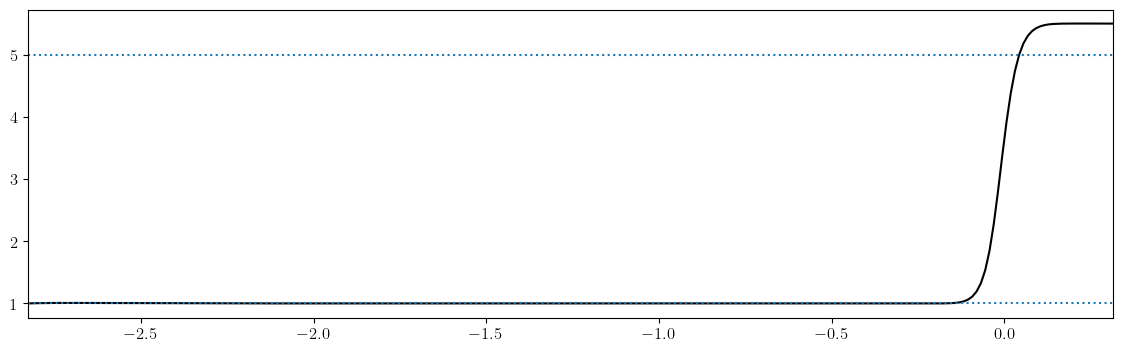

In [27]:
vari(-2,-1)

In [28]:
mode.cs_u, mode.R, mode.gamma

(2.345, 0.4001, 1.667)

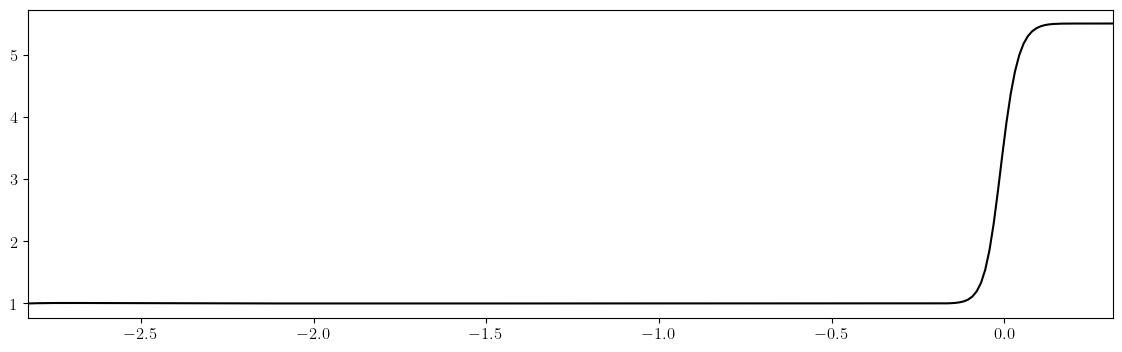

In [29]:
cs_sq = mode.gamma*mode.pre/mode.rho
fig = plt.figure(figsize=(14,4))
plt.plot(mode.z, cs_sq, c='k')
plt.xlim(mode.z[0], mode.z[-1])
plt.show()

In [30]:
cutoff = mode.gz/(2*np.sqrt(cs_sq))

In [31]:
cutoff2 = np.sqrt(cs_sq)/(2*HH)

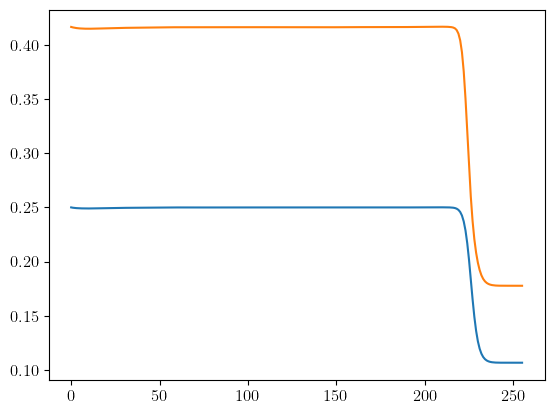

In [32]:
plt.plot(cutoff)
plt.plot(cutoff2)

In [33]:
# fig, axs = plt.subplots(2,1, figsize=(12,6), sharex=True)

# axs[0].plot(mode.z, mode.bxmz, color='k')
# # axs[0].plot(mode.z, bxmz, color='k')
# # axs[0].plot(data[:,0], np.exp(data[:,1]), color='k', ls=':')
# # axs[1].plot(grid.z, pressure, color='k')
# axs[1].plot(mode.z, mode.bymz, color='k')
# # axs[1].plot(mode.z, bymz, color='k')
# #axs[2].plot(grid.z, xya.xy.TTmz[-1], color='k')

# # axs[0].set_yscale("log")
# # axs[1].set_yscale("log")

# # axs[0].set_xlim(z[0], z[-1])
# # axs[1].set_xlim(z[0], z[-1])
# axs[1].set_xlim(mode.z[0], mode.z[-1])

# axs[0].set_ylabel(r"$\langle B_x\rangle_{xy}(z)$")
# axs[1].set_ylabel(r"$\langle B_y\rangle_{xy}(z)$")

# # xticks = (np.pi/10)*np.array([-9, -7, -5, -3, -1, 0, 1])
# # axs[2].set_xticks(xticks)
# # axs[2].set_xticklabels([r'$-\frac{9\pi}{10}$', r'$-\frac{7\pi}{10}$', r'$-\frac{5\pi}{10}$', \
# #                      r'$-\frac{3\pi}{10}$', r'$-\frac{\pi}{10}$', r'$0$', r'$\frac{\pi}{10}$'])
# plt.xlabel(r"$grid (z)$")
# plt.tight_layout()
# #plt.savefig("variation.jpg")

In [34]:
bxmz = xyaver.xy.bxmz[-100,:]
bymz = xyaver.xy.bymz[-100,:]

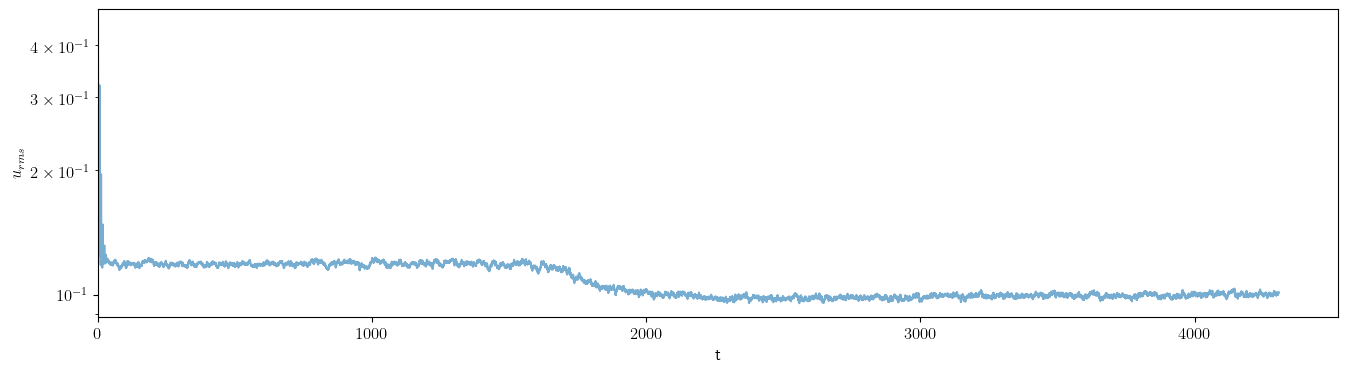

In [35]:
fig = plt.figure(figsize=(16,4))
plt.plot(ts.t, ts.urms, alpha=0.6)
# plt.plot(t_fit, u_fit, '--r')
plt.yscale('log')
plt.xlim(0,)
plt.xlabel("t")
plt.ylabel(r"$u_{rms}$")
plt.show()

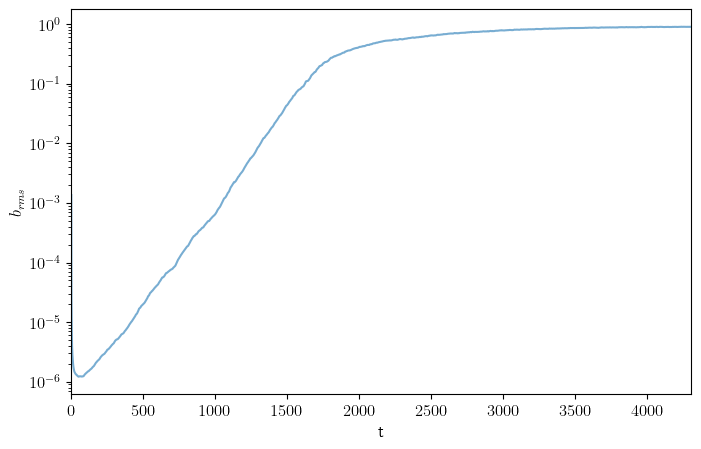

In [36]:
fig = plt.figure(figsize=(8,5))
plt.semilogy(ts.t, ts.brms, alpha=0.6)
# plt.plot(ts.t[t_low1:t_up1], brms_1)
# plt.plot(ts.t[t_low2:t_up2], brms_2)
# plt.axvline(x=yaver.t[indx_sat_d], c='k', ls=':')
# plt.axvline(x=tt[kin_t_d])
# plt.axvline(x=tt[kin_t_u])
#plt.plot(t_fit, u_fit, '--r')
plt.yscale('log')
plt.xlim(0,ts.t[-1])
plt.xlabel("t")
plt.ylabel(r"$b_{rms}$")
plt.show()

### Proposal

In [37]:
t_low1 = np.argmin(np.abs(ts.t-500))
t_up1 = np.argmin(np.abs(ts.t-1500))

In [38]:
def growth(x, a, b):
    return a*np.exp(b*x)

para1, _ = curve_fit(growth, ts.t[t_low1:t_up1], ts.brms[t_low1:t_up1], [0,0.0016])
brms_1 = growth(ts.t[t_low1:t_up1], *para1)
print(brms_1)

[1.29802487e-05 1.30090069e-05 1.30378289e-05 ... 4.40701189e-02
 4.41673986e-02 4.42648929e-02]


In [39]:
t_low2 = np.argmin(np.abs(ts.t-3000))
t_up2 = np.argmin(np.abs(ts.t-4200))

In [40]:
def linear(x, a, b):
    return a*x+b

para2, _ = curve_fit(linear, ts.t[t_low2:t_up2], ts.brms[t_low2:t_up2], [0.001,0.1])
brms_2 = linear(ts.t[t_low2:t_up2], *para2)

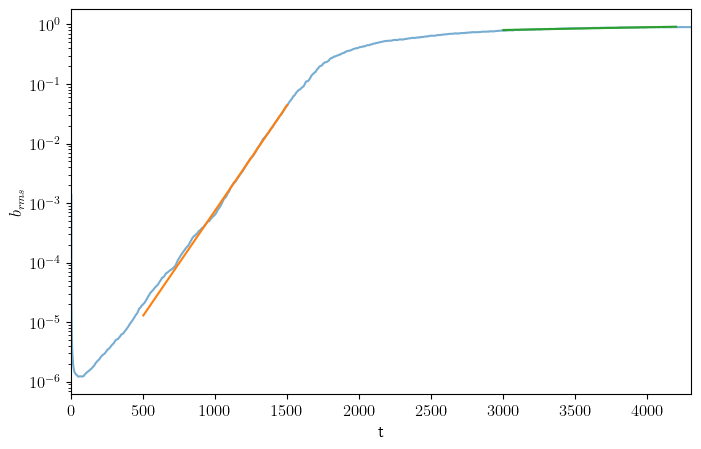

In [41]:
fig = plt.figure(figsize=(8,5))
plt.semilogy(ts.t, ts.brms, alpha=0.6)
plt.plot(ts.t[t_low1:t_up1], brms_1)
plt.plot(ts.t[t_low2:t_up2], brms_2)
# plt.axvline(x=yaver.t[indx_sat_d], c='k', ls=':')
# plt.axvline(x=tt[kin_t_d])
# plt.axvline(x=tt[kin_t_u])
#plt.plot(t_fit, u_fit, '--r')
plt.yscale('log')
plt.xlim(0,ts.t[-1])
plt.xlabel("t")
plt.ylabel(r"$b_{rms}$")
plt.show()

## using total data

In [42]:
uz_real = yaver.y.uzmxz

In [43]:
uz_real.shape

(10764, 400, 256)

In [44]:
uz_real[:,:3,3].shape

(10764, 3)

### taking fourier transform of $u_z(t,x,z=0)$ to get $\hat{u}_z(\omega,k_x)$

In [45]:
indx_t1 = np.argmin(np.abs(yaver.t - 170))  #to avoid the transient effects below t=170
indx_t2 = np.argmin(np.abs(yaver.t - 500))
# indx_t2 = -1

In [46]:
mode.indx_zref, 256*9

(229, 2304)

In [47]:
mode.indx_zref

229

In [48]:
uz_fourier = mode.FT(uz_real[indx_t1:indx_t2,:,225], 'ortho')

In [49]:
uz_fourier.shape

(825, 400)

### we can construct the dimensionless quantity 
$$\tilde{P}(\omega,k_x)=\frac{|\hat{u}_z|}{D^2}$$

In [50]:
logP = mode.logP(uz_fourier, mode.d)
# logP

In [51]:
logP.shape

(825, 400)

In [52]:
aa = np.linspace(0, 2*np.pi,100)

In [53]:
k_tilde = mode.k_tilde()
om_tilde = mode.omega_tilde(indx_t1, indx_t2)

In [54]:
mode.lx, mode.L0

(16.0, 2.004)

In [55]:
k_tilde[1], np.max(k_tilde)

(0.39269908169872414, 78.14711725804611)

Locator attempting to generate 3263 ticks ([-12.685, ..., 3.6249999999999982]), which exceeds Locator.MAXTICKS (1000).


/tmp/ipykernel_1361817/2560421311.py:5: RuntimeWarning:

invalid value encountered in sqrt

/tmp/ipykernel_1361817/2560421311.py:6: RuntimeWarning:

invalid value encountered in sqrt



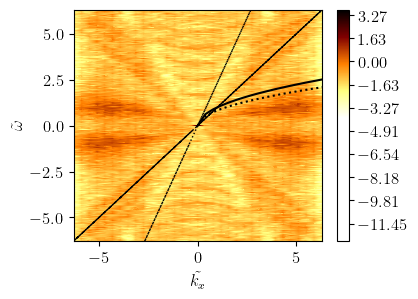

In [56]:
fig = plt.figure(figsize=(4,3))#sharex=True,
[X, Y] = np.meshgrid(k_tilde, om_tilde)
#plt.contourf(X, Y, logP, 1500, cmap='inferno', vmin=np.min(logP), vmax=np.max(logP))
plt.contourf(np.fft.fftshift(X), np.fft.fftshift(Y), np.fft.fftshift(logP), 4000, cmap='afmhot_r', vmin=-4, vmax=np.max(logP))
plt.plot(k_tilde, np.sqrt(mode.gz*k_tilde/(mode.omega0**2*mode.L0)), 'k')
plt.plot(k_tilde, np.sqrt(mode.gz*k_tilde/(mode.omega0**2*mode.L0)*(1-mode.q)/(1+mode.q)), ls='dotted', c='k')
plt.plot(k_tilde, mode.cs_d*k_tilde/(mode.omega0*mode.L0), ls='--', c='k', lw='1')
plt.plot(k_tilde, mode.cs_u*k_tilde/(mode.omega0*mode.L0), ls=':', c='k', lw='1')
# plt.plot(aa, mode.cs_u*aa, ls=':', c='k', lw='1')
# plt.plot(aa, mode.cs_d*aa, ls='--', c='k', lw='1')
# plt.plot(aa, np.sqrt(mode.gz*aa), ls='dotted', c='k')
# plt.plot(aa, np.sqrt(mode.gz*aa)*(1-mode.q)/(1+mode.q), ls='dashdot', c='k')
plt.xlim(-2*np.pi,2*np.pi)
plt.ylim(-2*np.pi,2*np.pi)
# plt.ylim(0,10)
plt.colorbar()
plt.xlabel(r"$\tilde{k_x}$")
plt.ylabel(r"$\tilde{\omega}$")
plt.savefig('k_om1.png')
plt.show()

Locator attempting to generate 3263 ticks ([-12.685, ..., 3.6249999999999982]), which exceeds Locator.MAXTICKS (1000).


/tmp/ipykernel_1361817/708889322.py:5: RuntimeWarning:

invalid value encountered in sqrt

/tmp/ipykernel_1361817/708889322.py:6: RuntimeWarning:

invalid value encountered in sqrt



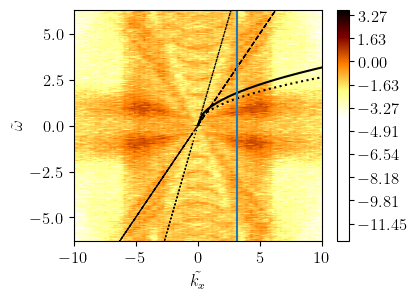

In [57]:
fig = plt.figure(figsize=(4,3))#sharex=True,
[X, Y] = np.meshgrid(k_tilde, om_tilde)
#plt.contourf(X, Y, logP, 1500, cmap='inferno', vmin=np.min(logP), vmax=np.max(logP))
plt.contourf(np.fft.fftshift(X), np.fft.fftshift(Y), np.fft.fftshift(logP), 4000, cmap='afmhot_r', vmin=-4, vmax=np.max(logP))
plt.plot(k_tilde, np.sqrt(mode.gz*k_tilde/(mode.omega0**2*mode.L0)), 'k')
plt.plot(k_tilde, np.sqrt(mode.gz*k_tilde/(mode.omega0**2*mode.L0)*(1-mode.q)/(1+mode.q)), ls='dotted', c='k')
plt.plot(k_tilde, mode.cs_d*k_tilde/(mode.omega0*mode.L0), ls='--', c='k', lw='1')
plt.plot(k_tilde, mode.cs_u*k_tilde/(mode.omega0*mode.L0), ls=':', c='k', lw='1')
plt.axvline(x=k_tilde[8])
# plt.plot(aa, mode.cs_u*aa, ls=':', c='k', lw='1')
# plt.plot(aa, mode.cs_d*aa, ls='--', c='k', lw='1')
# plt.plot(aa, np.sqrt(mode.gz*aa), ls='dotted', c='k')
# plt.plot(aa, np.sqrt(mode.gz*aa)*(1-mode.q)/(1+mode.q), ls='dashdot', c='k')
plt.xlim(-10,10)
plt.ylim(-2*np.pi,2*np.pi)
# plt.ylim(0,10)
plt.colorbar()
plt.xlabel(r"$\tilde{k_x}$")
plt.ylabel(r"$\tilde{\omega}$")
plt.savefig('k_om_ex.png')
plt.show()

In [58]:
mode.omega0

0.5

In [59]:
np.argmin(np.abs(k_tilde-2))
k_tilde[5]

1.9634954084936207

In [60]:
np.sqrt(mode.gz*k_tilde[5]/(mode.omega0**2*mode.L0))

1.3998486546700888

## kinematic Phase

In [61]:
ts.t

array([0.000000e+00, 2.070000e-01, 4.220000e-01, ..., 4.304814e+03,
       4.305080e+03, 4.305345e+03])

In [62]:
tt = yaver.t
tt

array([0.0000000e+00, 4.0035009e-01, 8.0013764e-01, ..., 4.3044019e+03,
       4.3048008e+03, 4.3052017e+03], dtype=float32)

In [63]:
indx_kin_d = np.argmin(np.abs(yaver.t-100))
indx_kin_u = np.argmin(np.abs(yaver.t-1500))

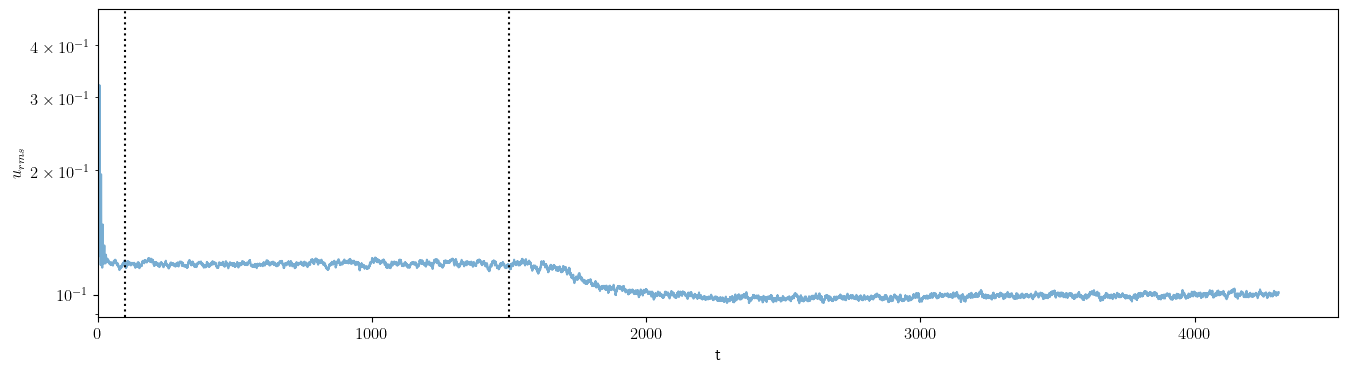

In [64]:
fig = plt.figure(figsize=(16,4))
plt.plot(ts.t, ts.urms, alpha=0.6)
plt.axvline(x=yaver.t[indx_kin_d], c='k', ls=':')
plt.axvline(x=yaver.t[indx_kin_u], c='k', ls=':')
# plt.plot(t_fit, u_fit, '--r')
plt.yscale('log')
plt.xlim(0,)
plt.xlabel("t")
plt.ylabel(r"$u_{rms}$")
plt.show()

In [65]:
uz_real.shape

(10764, 400, 256)

In [66]:
uz_fourier_kin = mode.FT(uz_real[indx_kin_d:indx_kin_u,:,212], 'ortho')
logP_kin = mode.logP(uz_fourier_kin, mode.d)
om_tilde_kin = mode.omega_tilde(indx_kin_d, indx_kin_u)

In [67]:
# uz_fourier_kin

In [68]:
kin_len = uz_real[indx_kin_d:indx_kin_u,:,225].shape[0]
kin_len

3500

## saturated phase

In [69]:
indx_sat_d = np.argmin(np.abs(tt-2550))
indx_sat_u = -889

In [70]:
len(tt)-889
tt[-889]

3950.0015

In [71]:
sat_len = uz_real[indx_sat_d:indx_sat_u,:,225].shape[0]
sat_len

3500

### we need to select data of same length from kinematic and saturated phase

In [72]:
kin_len == sat_len

True

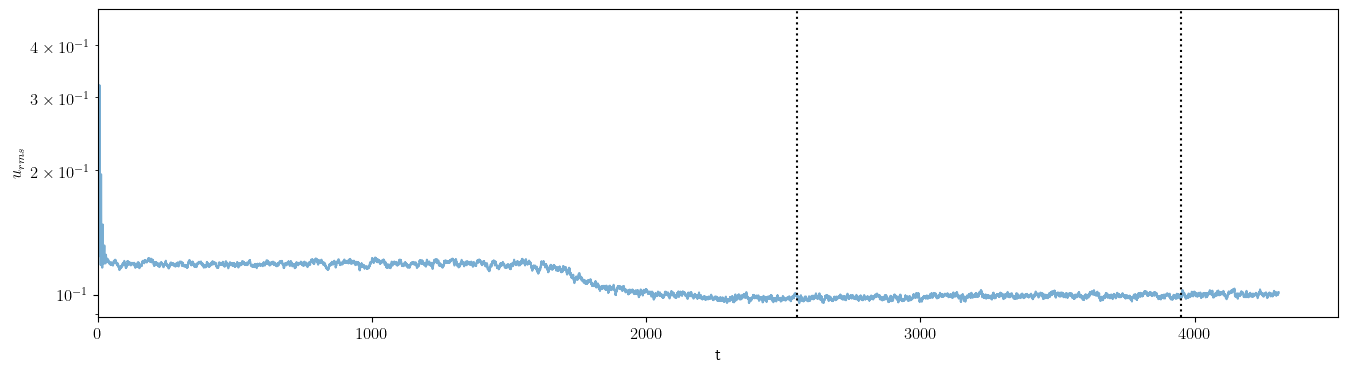

In [73]:
fig = plt.figure(figsize=(16,4))
plt.plot(ts.t, ts.urms, alpha=0.6)
plt.axvline(x=yaver.t[indx_sat_d], c='k', ls=':')
plt.axvline(x=yaver.t[indx_sat_u], c='k', ls=':')
# plt.plot(t_fit, u_fit, '--r')
plt.yscale('log')
plt.xlim(0,)
plt.xlabel("t")
plt.ylabel(r"$u_{rms}$")
plt.show()

In [74]:
uz_fourier_sat = mode.FT(uz_real[indx_sat_d:indx_sat_u,:,225], 'ortho')
logP_sat = mode.logP(uz_fourier_sat, mode.d)
om_tilde_sat = mode.omega_tilde(indx_sat_d, indx_sat_u)

In [75]:
indx_k_1 = np.argmin(np.abs(k_tilde - 1))

### finding $\tilde{P}(\tilde{\omega},\tilde{k}_x=2)$

In [76]:
indx_k_1 = np.argmin(np.abs(k_tilde - 1))
k_1 = round(k_tilde[indx_k_1],3)

In [77]:
k_1, indx_k_1

(1.178, 3)

In [78]:
k_tilde[indx_k_1]

1.1780972450961724

In [79]:
indx_kin = mode.upto(indx_kin_d, indx_kin_u)
indx_sat = mode.upto(indx_sat_d, indx_sat_u)

In [80]:
indx_kin

1750

In [81]:
P_k1_kin = np.exp(logP_kin[:indx_kin,indx_k_1])
P_k1_sat = np.exp(logP_sat[:indx_sat,indx_k_1])

### plotting $\tilde{P}(\tilde{\omega},\tilde{k}_x=2.36)$ as a function of $\tilde{\omega}$

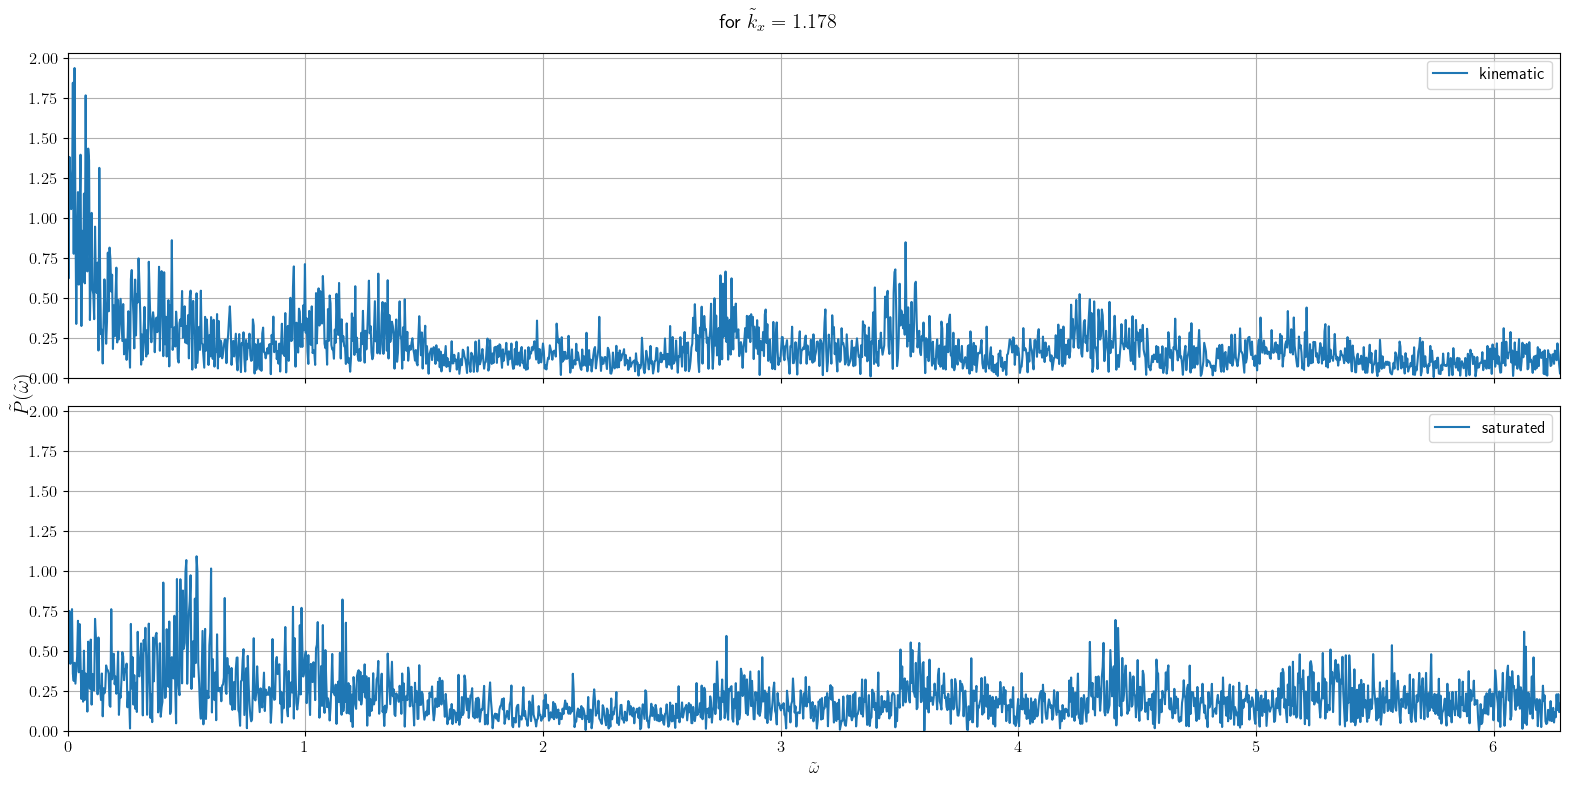

In [82]:
fig, axs = plt.subplots(2,1, sharex=True, sharey=True, figsize=(16,8))#sharex=True,

axs[0].plot(om_tilde_kin[:indx_kin], P_k1_kin[:], label='kinematic')
axs[0].grid()
# axs[0].set_xlim(0, 6)
axs[0].set_ylim(0,)
axs[0].legend()

axs[1].plot(om_tilde_sat[:indx_sat], P_k1_sat[:], label='saturated')
axs[1].grid()
axs[1].set_xlim(0, om_tilde_sat[indx_sat-1])
axs[1].set_ylim(0,)
axs[1].legend()

# plt.axvline(x=idl_f_kin)
# plt.axvline(x=idu_f_kin)
plt.xlabel(r"$\tilde{\omega}$")
fig.supylabel(r"$\tilde{P}(\tilde{\omega})$")
plt.suptitle(fr"for $\tilde{{k}}_x={k_1}$")
plt.tight_layout()
plt.show()

### smoothing data

In [83]:
mode.L0

2.004

In [84]:
P_k1_kin_filt = gaussian_filter(P_k1_kin[:indx_kin],3)
P_k1_sat_filt = gaussian_filter(P_k1_sat[:indx_sat],3)

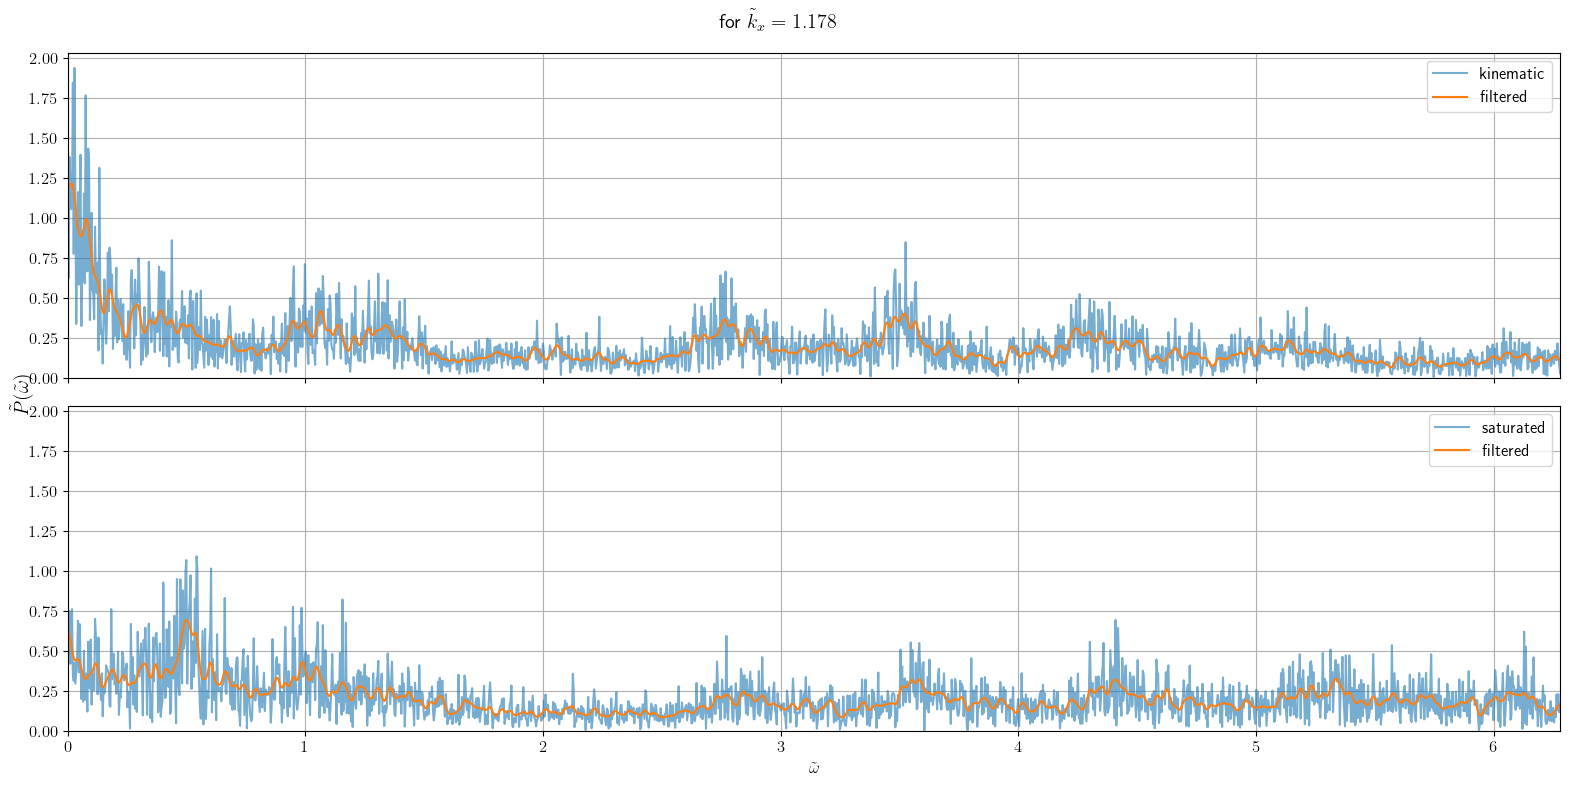

In [85]:
fig, axs = plt.subplots(2,1, sharex=True, sharey=True, figsize=(16,8))#sharex=True,

axs[0].plot(om_tilde_kin[:indx_kin], P_k1_kin, alpha=0.6, label='kinematic')
axs[0].plot(om_tilde_kin[:indx_kin], P_k1_kin_filt, label='filtered')
axs[0].grid()
# axs[0].set_xlim(0, 6)
axs[0].set_ylim(0,)
axs[0].legend()

axs[1].plot(om_tilde_sat[:indx_sat], P_k1_sat, alpha=0.6, label='saturated')
axs[1].plot(om_tilde_sat[:indx_sat], P_k1_sat_filt, label='filtered')
axs[1].grid()
axs[1].set_xlim(0, om_tilde_sat[indx_sat-1])
axs[1].set_ylim(0,)
axs[1].legend()

plt.xlabel(r"$\tilde{\omega}$")
fig.supylabel(r"$\tilde{P}(\tilde{\omega})$")
plt.suptitle(fr"for $\tilde{{k}}_x={k_1}$")
plt.tight_layout()
plt.show()

In [86]:
mode.q

0.18221521290792186

In [87]:
f_om = round(mode.fmodes(k_1),3)
p_om_0 = round(mode.pmodes(k_1,0),3)
p_om_1 = round(mode.pmodes(k_1,1),3)
p_om_2 = round(mode.pmodes(k_1,2),3)
p_om_3 = round(mode.pmodes(k_1,3),3)
p_om_4 = round(mode.pmodes(k_1,4),3)
p_om = []
for i in range(5):
    exec(f'p_om.append(p_om_{i})')

In [88]:
# f_om = round(mode.fmodes(0.392),3)
# p_om_0 = round(mode.pmodes_test(0.392,0),3)
# p_om_1 = round(mode.pmodes(0.392,1),3)
# p_om_2 = round(mode.pmodes(0.392,2),3)
# p_om_3 = round(mode.pmodes(0.392,3),3)
# p_om_4 = round(mode.pmodes(0.392,4),3)
# p_om = []
# for i in range(5):
#     exec(f'p_om.append(p_om_{i})')

In [89]:
mode.pmodes_test(k_1,0)

1.6237053290292625

In [90]:
mode.pmodes(k_1,0), mode.pmodes(0.392,0)

(2.655, 1.45)

In [91]:
display(Latex(fr'$\omega_f$ = {f_om}'))
display(Latex(fr'$\omega_{{p0}}$ = {p_om_0}'))
display(Latex(fr'$\omega_{{p1}}$ = {p_om_1}'))
display(Latex(fr'$\omega_{{p2}}$ = {p_om_2}'))
display(Latex(fr'$\omega_{{p3}}$ = {p_om_3}'))
display(Latex(fr'$\omega_{{p4}}$ = {p_om_4}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [92]:
mode.omega0, mode.gz, mode.cs_d

(0.5, 0.5, 1.001)

In [93]:
mode.cs_d, mode.gz

(1.001, 0.5)

In [94]:
mode.lz

3.14159

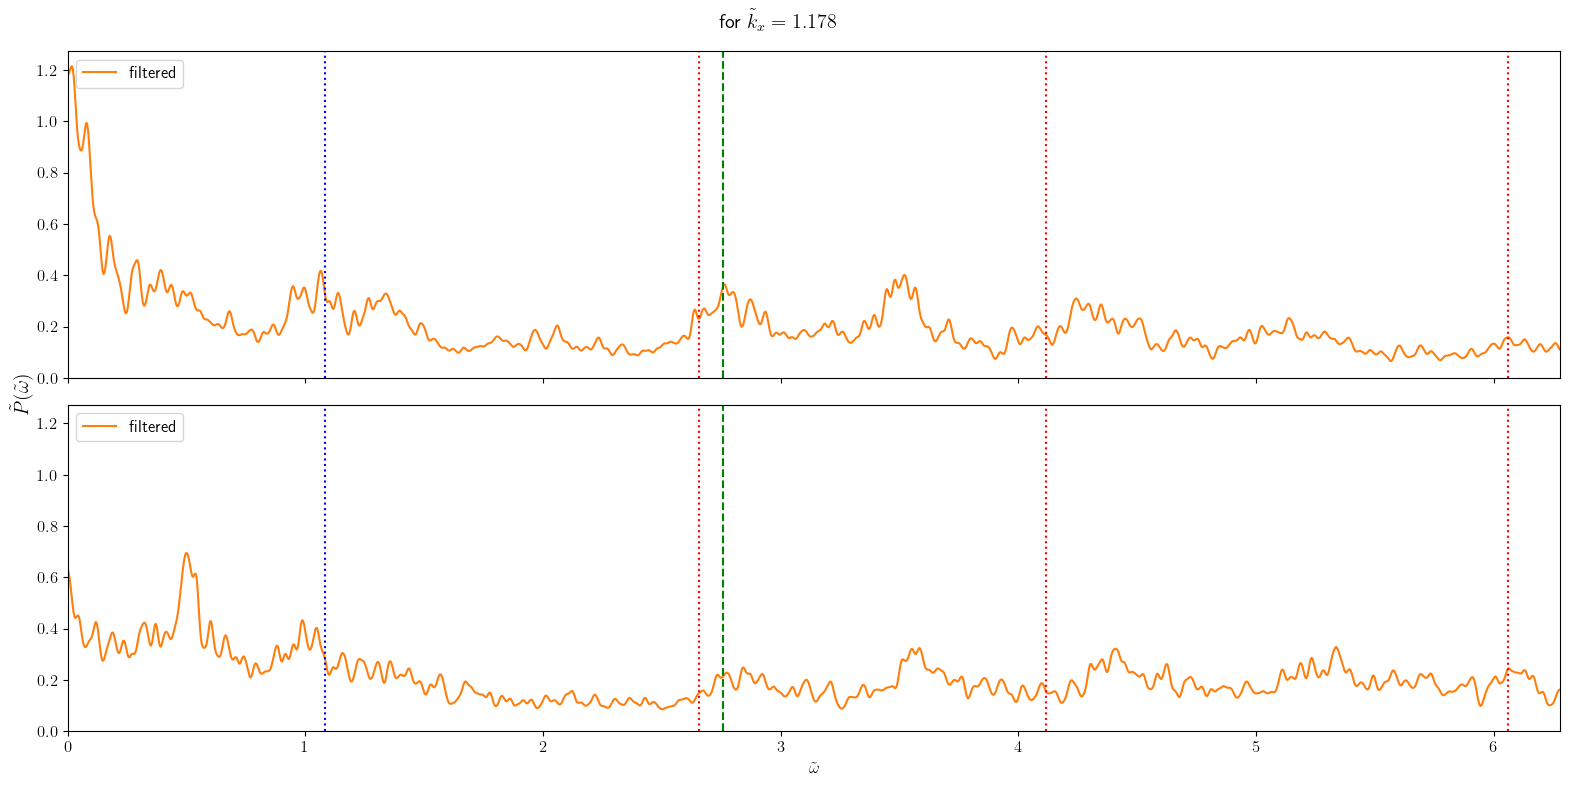

In [95]:
fig, axs = plt.subplots(2,1, sharex=True, sharey=True, figsize=(16,8))#sharex=True,

# axs[0].plot(om_tilde_kin[:indx_kin], P_k1_kin, c='k', alpha=0.4, label='kinematic')
axs[0].plot(om_tilde_kin[:indx_kin], P_k1_kin_filt, c='C1', label='filtered')
axs[0].axvline(x=f_om, ls=':', c='b')
for i in range(5):
    axs[0].axvline(x=p_om[i], ls=':', c='r')
# axs[0].axvline(x=mode.cs_u*k_1/(mode.L0*mode.omega0), ls='--', c='g')
axs[0].axvline(x=mode.cs_u*k_1/(mode.L0*mode.omega0), ls='--', c='g')
# axs[0].grid()
# axs[0].set_xlim(0, 6)
axs[0].set_ylim(0,)
axs[0].legend()

# axs[1].plot(om_tilde_sat[:indx_sat], P_k1_sat, c='k', alpha=0.4, label='saturated')
axs[1].plot(om_tilde_sat[:indx_sat], P_k1_sat_filt, c='C1', label='filtered')
axs[1].axvline(x=f_om, ls=':', c='b')
for i in range(5):
    axs[1].axvline(x=p_om[i], ls=':', c='r')
axs[1].axvline(x=mode.cs_u*k_1/(mode.L0*mode.omega0), ls='--', c='g')
# axs[1].grid()
axs[1].set_xlim(0, om_tilde_sat[indx_sat-1])
axs[1].set_ylim(0,)
axs[1].legend()

plt.xlabel(r"$\tilde{\omega}$")
fig.supylabel(r"$\tilde{P}(\tilde{\omega})$")
plt.suptitle(fr"for $\tilde{{k}}_x={k_1}$")
#plt.yscale('log')
plt.tight_layout()
plt.show()

## P-modes

### for kinematic phase

index of p-modes

In [96]:
index_kin = mode.mode_finder(om_tilde_kin[:indx_kin], P_k1_kin, False, thres=0.2, min_dist=200)
mode_index_kin = np.array([])
# for i in range(len(index_kin)):
i = 0
while index_kin[i]<300:
        index_kin = np.delete(index_kin, i)
        # i += i+1
mode_index_kin = index_kin
        
lb_kin = [130, 130, 130, 130, 120]
ub_kin = [130, 130, 130, 130, 120]

indx_list_kin = []
om_mode_kin = []
for i in range(0,len(mode_index_kin)-2):
    indx_list_kin.append(mode.mode_indx(mode_index_kin[i], lb_kin[i], ub_kin[i]))
    om_mode_kin.append(om_tilde_kin[indx_list_kin[i]['lb']:indx_list_kin[i]['ub']])
# lb[0], lb[-1], mode_index

In [97]:
# p_mode = []
# for i in range(5):
#     p_mode.append(mode.mode_data1(P_k1_kin, om_tilde_kin[:indx_kin], mode_index[i],130,130))

In [98]:
p_mode_kin = []
for i in range(len(mode_index_kin)-2):
    p_mode_kin.append(mode.mode_data(P_k1_kin, om_tilde_kin[:indx_kin], indx_list_kin[i]))

IndexError: list index out of range

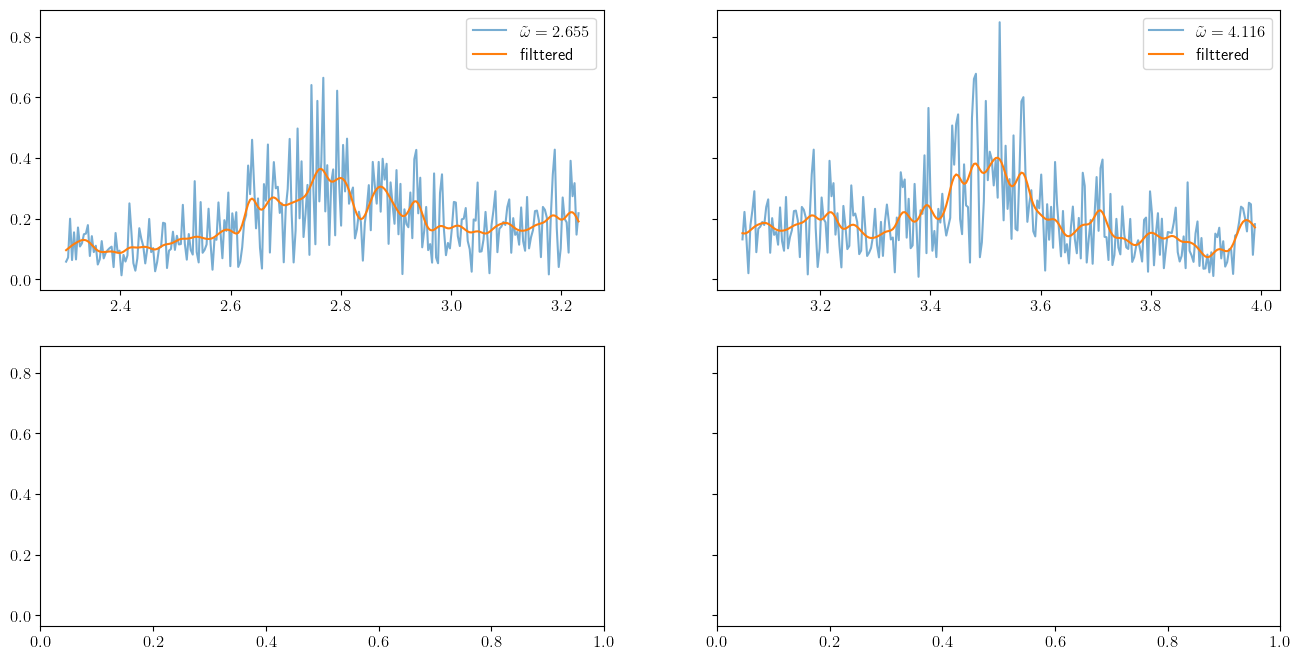

In [99]:
i = 0
fig, axs = plt.subplots(2,2, sharey=True, figsize=(16,8))

axs[0,0].plot(p_mode_kin[i]['x'], p_mode_kin[i]['y'], alpha=0.6, label=fr"$\tilde{{\omega}}={p_om[i]}$")
axs[0,0].plot(om_mode_kin[i], P_k1_kin_filt[indx_list_kin[i]['lb']:indx_list_kin[i]['ub']], label='filttered')
# axs[0,0].axvline(x = om_tilde_kin[mode_index_kin[1]])
axs[0,0].legend()
axs[0,1].plot(p_mode_kin[i+1]['x'], p_mode_kin[i+1]['y'], alpha=0.6, label=fr"$\tilde{{\omega}}={p_om[i+1]}$")
axs[0,1].plot(om_mode_kin[i+1], P_k1_kin_filt[indx_list_kin[i+1]['lb']:indx_list_kin[i+1]['ub']], label='filttered')
axs[0,1].legend()
axs[1,0].plot(p_mode_kin[i+2]['x'], p_mode_kin[i+2]['y'], alpha=0.6, label=fr"$\tilde{{\omega}}={p_om[i+2]}$")
axs[1,0].plot(om_mode_kin[i+2], P_k1_kin_filt[indx_list_kin[i+2]['lb']:indx_list_kin[i+2]['ub']], label='filttered')
axs[1,0].legend()
axs[1,1].plot(p_mode_kin[i+3]['x'], p_mode_kin[i+3]['y'], alpha=0.6, label=fr"$\tilde{{\omega}}={p_om[i+3]}$")
axs[1,1].plot(om_mode_kin[i+3], P_k1_kin_filt[indx_list_kin[i+3]['lb']:indx_list_kin[i+3]['ub']], label='filttered')
axs[1,1].legend()

plt.suptitle('p-modes for kinetic phase')
fig.supxlabel(r"$\tilde{\omega}$")
fig.supylabel(r"$\tilde{P}(\tilde{\omega})$")
plt.tight_layout()
plt.show()

### fitting

In [ ]:
def lorentzian(x, a, b, c, d, e):
    y = a/((x-b)**2+np.exp(c))+d+e*x
    return y

In [ ]:
sig_kin = []
sig_kin_p = []
for i in range(0,len(mode_index_kin)-2):
    sig_kin.append(mode.sigma(p_mode_kin[i]['y'], P_k1_kin_filt[indx_list_kin[i]['lb']:indx_list_kin[i]['ub']]))
    sig_kin_p.append(sig_kin[i]*np.ones(len(p_mode_kin[i]['y'])))

In [ ]:
p0_kin = []
fitted_kin_p = []
for i in range(0,len(mode_index_kin)-2):
    p0_kin.append(np.array([2,om_tilde_kin[mode_index_kin[i]],-2,100,0.1]))
    fitted_kin_p.append(mode.mode_fit(lorentzian,om_tilde_kin[indx_list_kin[i]['lb']:indx_list_kin[i]['ub']],p_mode_kin[i]['y'], base=True, p0=p0_kin[i]))

In [ ]:
p_mode_om_kin = []
for i in range(0,len(mode_index_kin)-1):
    p_mode_om_kin.append(round(om_tilde_kin[mode_index_kin[i]],3))

ValueError: x and y must have same first dimension, but have shapes (260,) and (2, 1000)

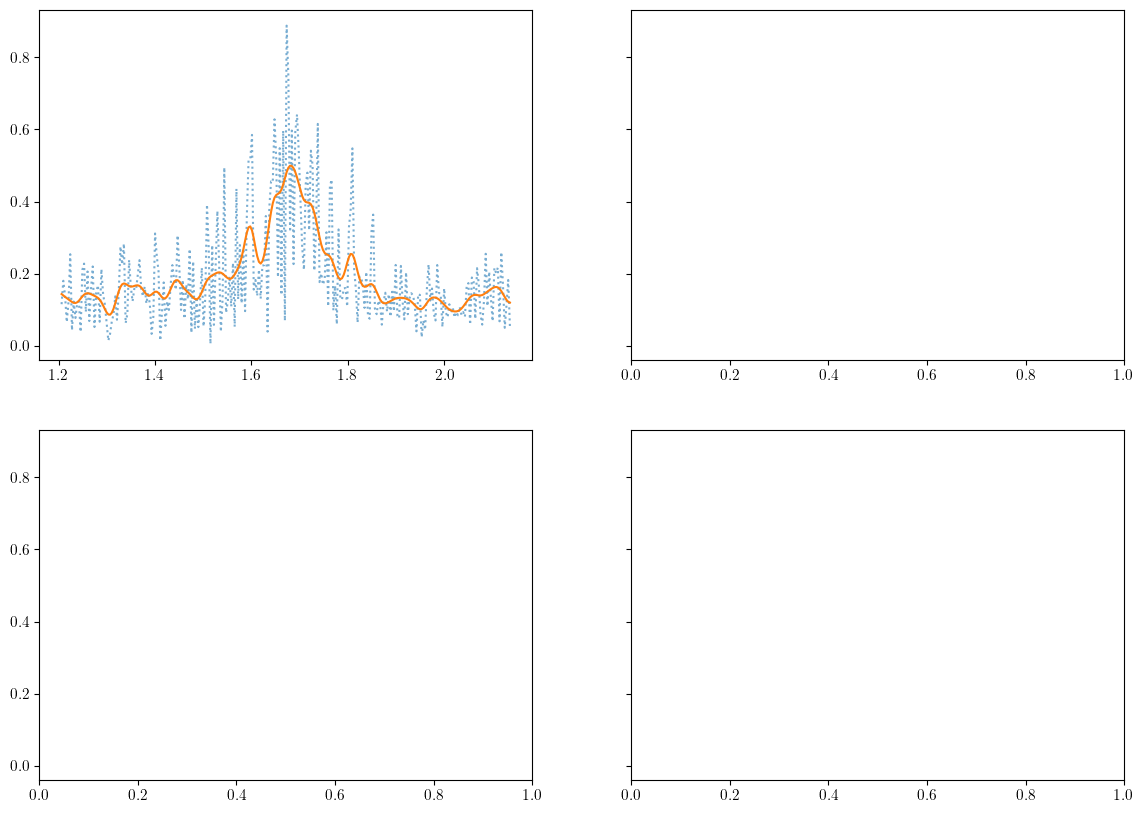

In [ ]:
i = 0
fig, axs = plt.subplots(2,2, sharey=True, figsize=(14,10))

axs[0,0].plot(p_mode_kin[i]['x'], p_mode_kin[i]['y'], ls=":", alpha=0.6, label=fr"$\tilde{{\omega}}={p_mode_om_kin[i]}$")
axs[0,0].plot(om_mode_kin[i], P_k1_kin_filt[indx_list_kin[i]['lb']:indx_list_kin[i]['ub']], label='filttered')
axs[0,0].plot(om_mode_kin[i], fitted_kin_p[i], color='k')
# axes[0].plot(om_tilde_kin[idl_f_kin:idu_f_kin], fitted_f_kin_lor, color='k')
axs[0,0].legend()

axs[0,1].plot(p_mode_kin[i+1]['x'], p_mode_kin[i+1]['y'], ls=":", alpha=0.6, label=fr"$\tilde{{\omega}}={p_mode_om_kin[i+1]}$")
axs[0,1].plot(om_mode_kin[i+1], P_k1_kin_filt[indx_list_kin[i+1]['lb']:indx_list_kin[i+1]['ub']], label='filttered')
axs[0,1].plot(om_mode_kin[i+1], fitted_kin_p[i+1], color='k')
# axes[0].plot(om_tilde_kin[idl_f_kin:idu_f_kin], fitted_f_kin_lor, color='k')
axs[0,1].legend()

axs[1,0].plot(p_mode_kin[i+2]['x'], p_mode_kin[i+2]['y'], ls=":", alpha=0.6, label=fr"$\tilde{{\omega}}={p_mode_om_kin[i+2]}$")
axs[1,0].plot(om_mode_kin[i+2], P_k1_kin_filt[indx_list_kin[i+2]['lb']:indx_list_kin[i+2]['ub']], label='filttered')
axs[1,0].plot(om_mode_kin[i+2], fitted_kin_p[i+2], color='k')
# axes[0].plot(om_tilde_kin[idl_f_kin:idu_f_kin], fitted_f_kin_lor, color='k')
axs[1,0].legend()

axs[1,1].plot(p_mode_kin[i+3]['x'], p_mode_kin[i+3]['y'], ls=":", alpha=0.6, label=fr"$\tilde{{\omega}}={p_mode_om_kin[i+3]}$")
axs[1,1].plot(om_mode_kin[i+3], P_k1_kin_filt[indx_list_kin[i+3]['lb']:indx_list_kin[i+3]['ub']], label='filttered')
axs[1,1].plot(om_mode_kin[i+3], fitted_kin_p[i+3], color='k')
# axes[0].plot(om_tilde_kin[idl_f_kin:idu_f_kin], fitted_f_kin_lor, color='k')
axs[1,1].legend()

plt.suptitle('p-modes for kinematic phase')
fig.supxlabel(r"$\tilde{\omega}$")
fig.supylabel(r"$\tilde{P}(\tilde{\omega})$")
plt.tight_layout()
plt.show()

### for saturated phase

index of p-modes

In [ ]:
index_sat = mode.mode_finder(om_tilde_sat[:indx_sat], P_k1_sat, False, thres=0.2, min_dist=200)
mode_index_sat = np.array([])
for i in range(len(index_sat)):
    if index_sat[i]<80:
        mode_index_sat = np.delete(index_sat, i)

lb_sat = [130, 130, 130, 130, 120]
ub_sat = [130, 130, 130, 130, 120]

indx_list_sat = []
om_mode_sat = []
for i in range(0,len(mode_index_sat)-2):
    indx_list_sat.append(mode.mode_indx(mode_index_sat[i], lb_sat[i], ub_sat[i]))
    om_mode_sat.append(om_tilde_sat[indx_list_sat[i]['lb']:indx_list_sat[i]['ub']])
# lb[0], lb[-1], mode_index

In [ ]:
mode_index_sat

array([ 464,  719,  941, 1177, 1442, 1702])

In [ ]:
mode_index_kin

array([ 466,  712,  932, 1193, 1442, 1683])

In [ ]:
p_mode_sat = []
for i in range(len(mode_index_sat)-2):
    p_mode_sat.append(mode.mode_data(P_k1_sat, om_tilde_sat[:indx_sat], indx_list_sat[i]))

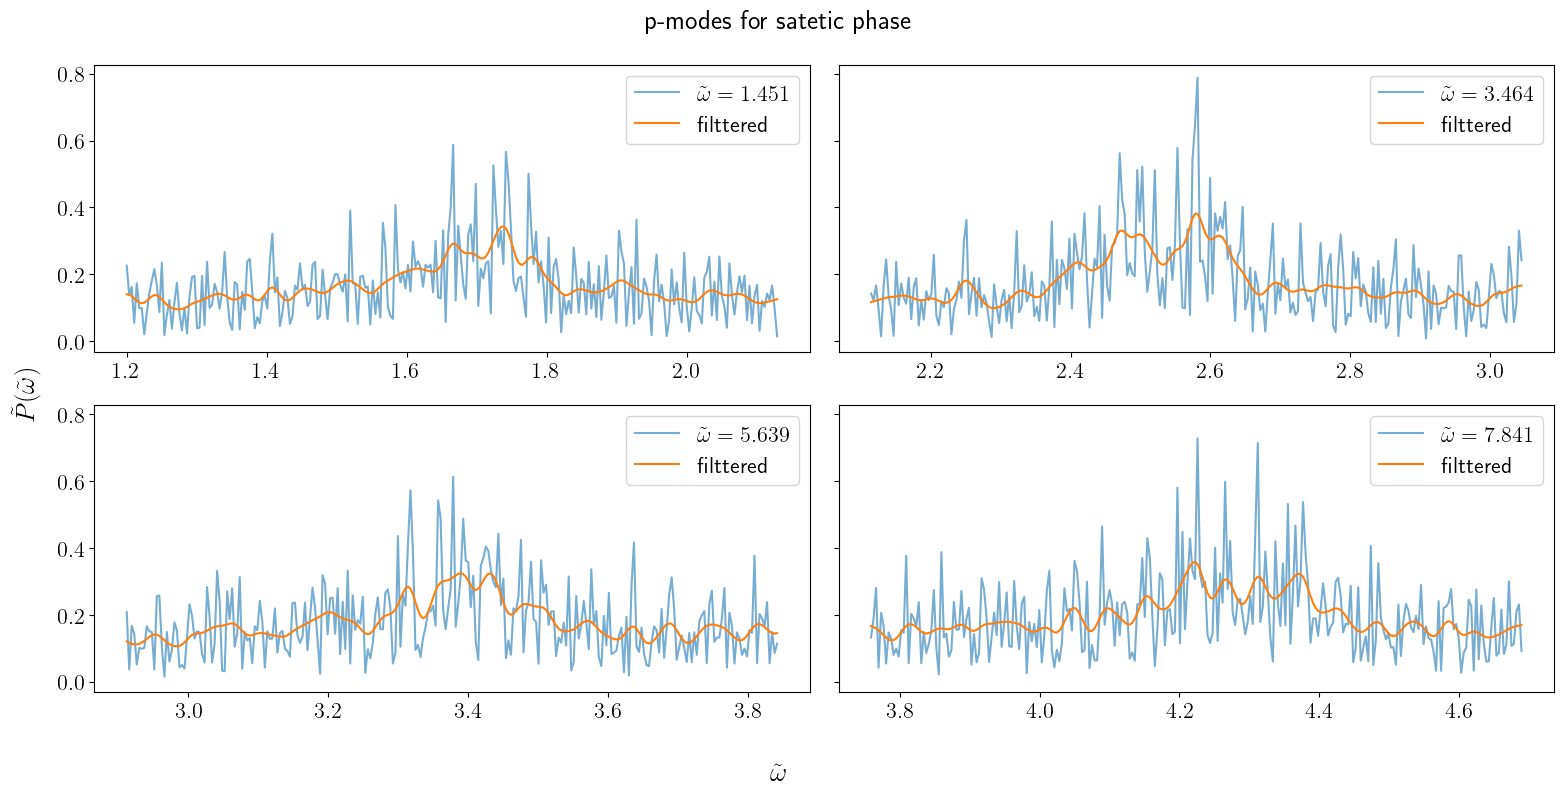

In [ ]:
                i = 0
fig, axs = plt.subplots(2,2, sharey=True, figsize=(16,8))

axs[0,0].plot(p_mode_sat[i]['x'], p_mode_sat[i]['y'], alpha=0.6, label=fr"$\tilde{{\omega}}={p_om[i]}$")
axs[0,0].plot(om_mode_sat[i], P_k1_sat_filt[indx_list_sat[i]['lb']:indx_list_sat[i]['ub']], label='filttered')
# axs[0,0].axvline(x = om_tilde_sat[mode_index_sat[1]])
axs[0,0].legend()
axs[0,1].plot(p_mode_sat[i+1]['x'], p_mode_sat[i+1]['y'], alpha=0.6, label=fr"$\tilde{{\omega}}={p_om[i+1]}$")
axs[0,1].plot(om_mode_sat[i+1], P_k1_sat_filt[indx_list_sat[i+1]['lb']:indx_list_sat[i+1]['ub']], label='filttered')
axs[0,1].legend()
axs[1,0].plot(p_mode_sat[i+2]['x'], p_mode_sat[i+2]['y'], alpha=0.6, label=fr"$\tilde{{\omega}}={p_om[i+2]}$")
axs[1,0].plot(om_mode_sat[i+2], P_k1_sat_filt[indx_list_sat[i+2]['lb']:indx_list_sat[i+2]['ub']], label='filttered')
axs[1,0].legend()
axs[1,1].plot(p_mode_sat[i+3]['x'], p_mode_sat[i+3]['y'], alpha=0.6, label=fr"$\tilde{{\omega}}={p_om[i+3]}$")
axs[1,1].plot(om_mode_sat[i+3], P_k1_sat_filt[indx_list_sat[i+3]['lb']:indx_list_sat[i+3]['ub']], label='filttered')
axs[1,1].legend()

plt.suptitle('p-modes for satetic phase')
fig.supxlabel(r"$\tilde{\omega}$")
fig.supylabel(r"$\tilde{P}(\tilde{\omega})$")
plt.tight_layout()
plt.show()

In [ ]:
sig_sat = []
sig_sat_p = []
for i in range(0,len(mode_index_sat)-2):
    sig_sat.append(mode.sigma(p_mode_sat[i]['y'], P_k1_sat_filt[indx_list_sat[i]['lb']:indx_list_sat[i]['ub']]))
    sig_sat_p.append(sig_sat[i]*np.ones(len(p_mode_sat[i]['y'])))

In [ ]:
p0_sat = []
fitted_sat_p = []
for i in range(0,len(mode_index_sat)-2):
    p0_sat.append(np.array([2,om_tilde_sat[mode_index_sat[i]],-2,100,0.1]))
    fitted_sat_p.append(mode.mode_fit(lorentzian,om_tilde_sat[indx_list_sat[i]['lb']:indx_list_sat[i]['ub']],p_mode_sat[i]['y'],True, p0=p0_sat[i]))

In [ ]:
p_mode_om_sat = []
for i in range(0,len(mode_index_sat)-1):
    p_mode_om_sat.append(round(om_tilde_sat[mode_index_sat[i]],3))

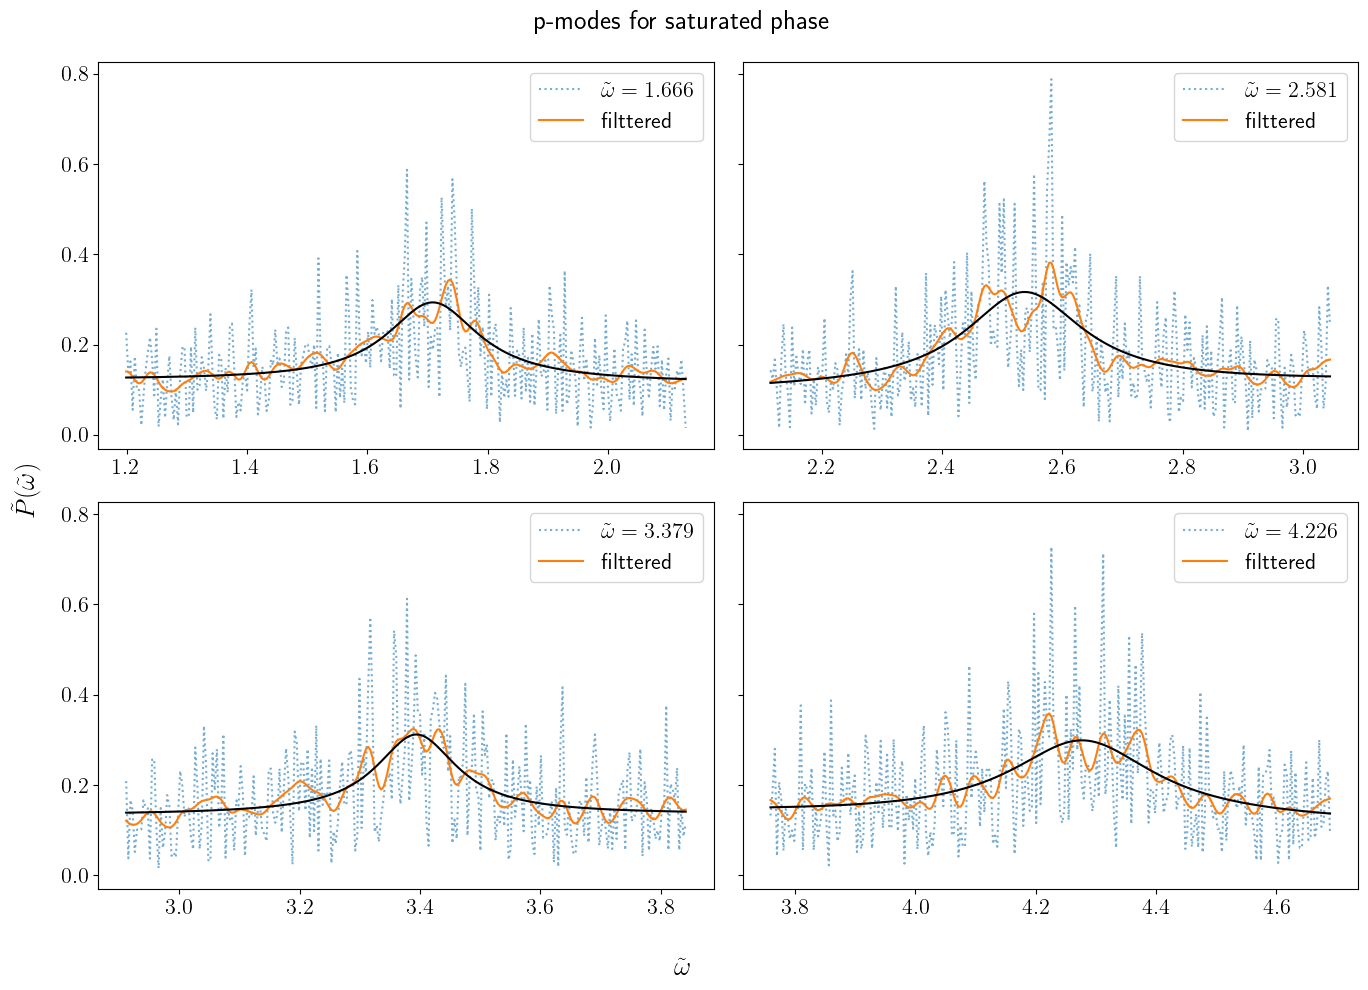

In [ ]:
i = 0
fig, axs = plt.subplots(2,2, sharey=True, figsize=(14,10))

axs[0,0].plot(p_mode_sat[i]['x'], p_mode_sat[i]['y'], ls=":", alpha=0.6, label=fr"$\tilde{{\omega}}={p_mode_om_sat[i]}$")
axs[0,0].plot(om_mode_sat[i], P_k1_sat_filt[indx_list_sat[i]['lb']:indx_list_sat[i]['ub']], label='filttered')
axs[0,0].plot(om_mode_sat[i], fitted_sat_p[i], color='k')
# axes[0].plot(om_tilde_sat[idl_f_sat:idu_f_sat], fitted_f_sat_lor, color='k')
axs[0,0].legend()

axs[0,1].plot(p_mode_sat[i+1]['x'], p_mode_sat[i+1]['y'], ls=":", alpha=0.6, label=fr"$\tilde{{\omega}}={p_mode_om_sat[i+1]}$")
axs[0,1].plot(om_mode_sat[i+1], P_k1_sat_filt[indx_list_sat[i+1]['lb']:indx_list_sat[i+1]['ub']], label='filttered')
axs[0,1].plot(om_mode_sat[i+1], fitted_sat_p[i+1], color='k')
# axes[0].plot(om_tilde_sat[idl_f_sat:idu_f_sat], fitted_f_sat_lor, color='k')
axs[0,1].legend()

axs[1,0].plot(p_mode_sat[i+2]['x'], p_mode_sat[i+2]['y'], ls=":", alpha=0.6, label=fr"$\tilde{{\omega}}={p_mode_om_sat[i+2]}$")
axs[1,0].plot(om_mode_sat[i+2], P_k1_sat_filt[indx_list_sat[i+2]['lb']:indx_list_sat[i+2]['ub']], label='filttered')
axs[1,0].plot(om_mode_sat[i+2], fitted_sat_p[i+2], color='k')
# axes[0].plot(om_tilde_sat[idl_f_sat:idu_f_sat], fitted_f_sat_lor, color='k')
axs[1,0].legend()

axs[1,1].plot(p_mode_sat[i+3]['x'], p_mode_sat[i+3]['y'], ls=":", alpha=0.6, label=fr"$\tilde{{\omega}}={p_mode_om_sat[i+3]}$")
axs[1,1].plot(om_mode_sat[i+3], P_k1_sat_filt[indx_list_sat[i+3]['lb']:indx_list_sat[i+3]['ub']], label='filttered')
axs[1,1].plot(om_mode_sat[i+3], fitted_sat_p[i+3], color='k')
# axes[0].plot(om_tilde_sat[idl_f_sat:idu_f_sat], fitted_f_sat_lor, color='k')
axs[1,1].legend()

plt.suptitle('p-modes for saturated phase')
fig.supxlabel(r"$\tilde{\omega}$")
fig.supylabel(r"$\tilde{P}(\tilde{\omega})$")
plt.tight_layout()
plt.show()

## $k_x$ vs. mode parameters

In [ ]:
indx_k = [1,2,3,4,5]

### frequencies of f-modes for different $k_x$

In [ ]:
f_mode_om = []
for i in range(len(indx_k)):
    f_mode_om.append(round(mode.fmodes(round(k_tilde[indx_k[i]],3)),3))

### frequencies of p-modes for different $k_x$

In [ ]:
p_mode_om = np.empty([len(indx_k),3])

for i in range(len(indx_k)):
    for j in range(3):
        p_mode_om[i,j] = round(mode.pmodes(k_tilde[indx_k[i]],j),3)

In [ ]:
p_mode_om.shape

(5, 3)

In [ ]:
P_k_kin = []
P_k_sat = []

P_k_kin_filt = []
P_k_sat_filt = []

for i in range(len(indx_k)):
    P_k_kin.append(np.exp(logP_kin[:indx_kin,indx_k[i]]))
    P_k_sat.append(np.exp(logP_sat[:indx_sat,indx_k[i]]))
    P_k_kin_filt.append(gaussian_filter(P_k_kin[i],3))
    P_k_sat_filt.append(gaussian_filter(P_k_sat[i],3))

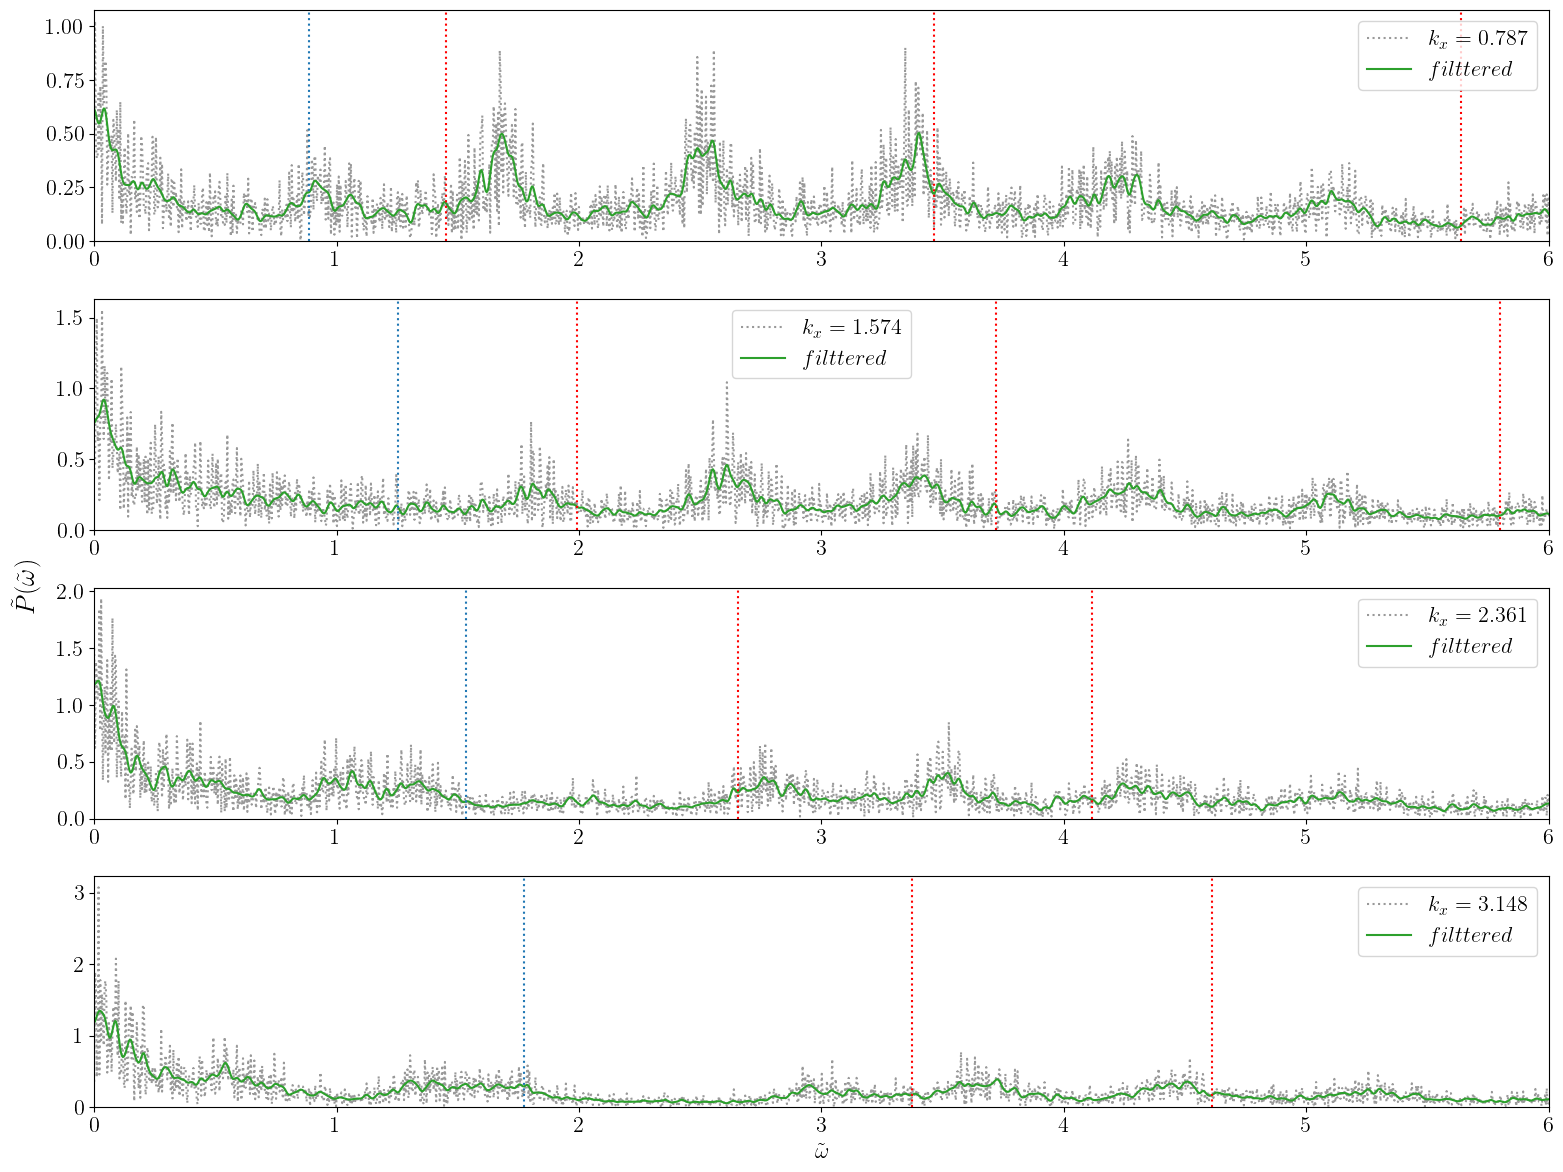

In [ ]:
fig, axs = plt.subplots(4,1, figsize=(16,12))#sharex=True,

axs[0].plot(om_tilde_kin[:indx_kin], P_k_kin[0], c='k', ls=':', alpha=0.4, label=fr'$k_x={round(k_tilde[1],3)}$')
axs[0].plot(om_tilde_kin[:indx_kin], P_k_kin_filt[0], c='C2', label=r'$filttered$')
# axs[0].plot((om_tilde_kin[idl_p2_kin_1:idu_p2_kin_1]), fitted_p2_kin_lor_1, color='k', label=r'$fitted$')
axs[0].axvline(x=f_mode_om[0], ls=':')
for i in range(3):
    axs[0].axvline(x=p_mode_om[0,i], c='r', ls=':')
# axs[0].grid()
axs[0].set_xlim(0, 6)
axs[0].set_ylim(0,)
axs[0].legend()

axs[1].plot(om_tilde_kin[:indx_kin], P_k_kin[1], c='k', ls=':', alpha=0.4, label=fr'$k_x={round(k_tilde[2],3)}$')
axs[1].plot(om_tilde_kin[:indx_kin], P_k_kin_filt[1], c='C2', label=r'$filttered$')
# axs[1].plot((om_tilde_kin[idl_p2_kin_2:idu_p2_kin_2]), fitted_p2_kin_lor_2, color='k', label=r'$fitted$')
axs[1].axvline(x=f_mode_om[1], ls=':')
for i in range(3):
    axs[1].axvline(x=p_mode_om[1,i], c='r', ls=':')
# axs[1].grid()
axs[1].set_xlim(0, 6)
axs[1].set_ylim(0,)
axs[1].legend()

axs[2].plot(om_tilde_kin[:indx_kin], P_k_kin[2], c='k', ls=':', alpha=0.4, label=fr'$k_x={round(k_tilde[3],3)}$')
axs[2].plot(om_tilde_kin[:indx_kin], P_k_kin_filt[2], c='C2', label=r'$filttered$')
# axs[2].plot((om_tilde_kin[idl_p2_kin_3:idu_p2_kin_3]), fitted_p2_kin_lor_3, color='k', label=r'$fitted$')
axs[2].axvline(x=f_mode_om[2], ls=':')
for i in range(3):
    axs[2].axvline(x=p_mode_om[2,i], c='r', ls=':')
# axs[2].grid()
axs[2].set_xlim(0, 6)
axs[2].set_ylim(0,)
axs[2].legend()

axs[3].plot(om_tilde_kin[:indx_kin], P_k_kin[3], c='k', ls=':', alpha=0.4, label=fr'$k_x={round(k_tilde[4],3)}$')
axs[3].plot(om_tilde_kin[:indx_kin], P_k_kin_filt[3], c='C2', label=r'$filttered$')
axs[3].axvline(x=f_mode_om[3], ls=':')
# axs[3].plot((om_tilde_kin[idl_p2_kin_4:idu_p2_kin_4]), fitted_p2_kin_lor_4, color='k', label=r'$fitted$')
for i in range(3):
    axs[3].axvline(x=p_mode_om[3,i], c='r', ls=':')
# axs[3].grid()
axs[3].set_xlim(0, 6)
axs[3].set_ylim(0,)
axs[3].legend()


# plt.axvline(x=idl_f_kin)
# plt.axvline(x=idu_f_kin)
plt.xlabel(r"$\tilde{\omega}$")
fig.supylabel(r"$\tilde{P}(\tilde{\omega})$")
# plt.suptitle(r"for $\tilde{k}_x=2$")
plt.tight_layout()
plt.show()

In [ ]:
f_om

0.886